In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

## Acquire Data Set

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


## Use the above data set for the exercises below:

## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [3]:
# Resetting index to the date and sorting
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


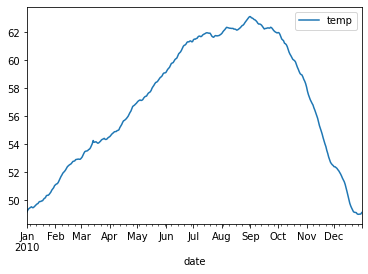

In [4]:
# Re-sample and visualize
daily_average = df.resample('D').mean()
daily_average.plot()
None

## 2. Write the code necessary to visualize the minimum temperature over time.

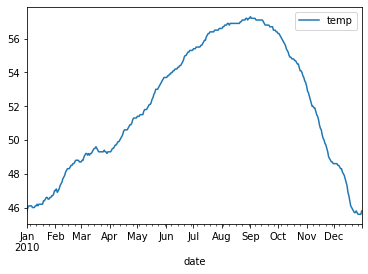

In [5]:
df.resample('D').min().plot()
None

## 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

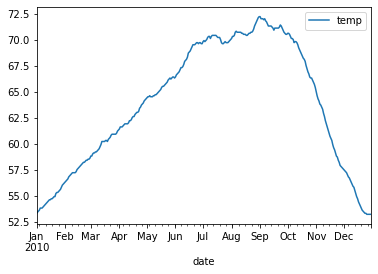

In [6]:
df.resample('D').max().plot()

## 4. Which month is the coldest, on average?

In [7]:
monthly_average = df.resample('M').mean()
monthly_average.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

*January is the coldest month.*

## 5. Which month has the highest average temperature?

In [8]:
monthly_average.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

*September had higherst average temp.*

## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [9]:
daily_change = df.resample('D').agg(['min', 'max'])
daily_change.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [10]:
daily_change['change'] = daily_change[('temp', 'max')] - daily_change[('temp', 'min')]
daily_change.head()

temp       change
             min   max       
date                         
2010-01-01  45.8  53.3    7.5
2010-01-02  46.0  53.4    7.4
2010-01-03  46.1  53.5    7.4
2010-01-04  46.1  53.6    7.5
2010-01-05  46.1  53.8    7.7

<AxesSubplot:xlabel='date'>

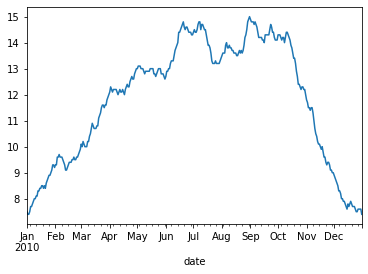

In [11]:
daily_change.change.plot()

In [12]:
# calculate month with highest daily temp variability
daily_change.resample('M').mean().change.idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

*September has highest daily temperature variability.*

## 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

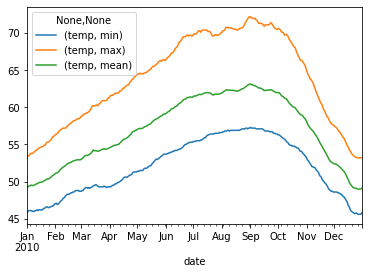

In [13]:
daily_min_max_avg = df.resample('D').agg(['min', 'max', 'mean'])
daily_min_max_avg.plot()

## Acquire Data Set

In [14]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


## Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?

In [15]:
# set the data as the index and sort
df = df.set_index('date').sort_index()

In [16]:
df.resample("M").precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

*December 2015 has highest amount of precipitation.*

- Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

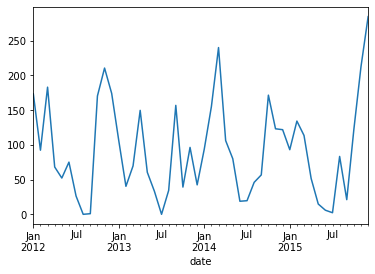

In [17]:
df.resample('M').precipitation.sum().plot()

- Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:title={'center':'Biweekly Average Wind'}, xlabel='date'>

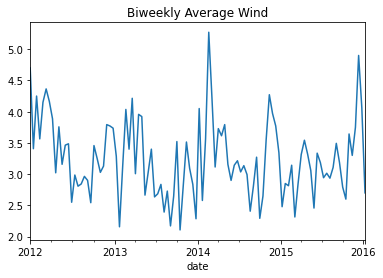

In [18]:
df.resample('2w').wind.mean().plot(title='Biweekly Average Wind')

- Which year-month combination is the windiest?

In [19]:
df.resample("M").wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

*December 2015 was the windiest month.*

- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [20]:
# Reset the df without data as index
df = data.seattle_weather()
# Make a year column
df['year'] = df['date'].dt.year
# Make a sunny weather boolean column
df['is_sunny'] = df.weather =='sun'
# Calulate with a groupby
df.groupby(['year']).is_sunny.mean().sort_values()

year
2012    0.322404
2015    0.493151
2013    0.561644
2014    0.578082
Name: is_sunny, dtype: float64

*2014 was the sunniest year.*

- In which month does it rain the most?

In [21]:
# Create a month column
df['month'] = df.date.dt.month
# Make a rainy weather boolean column
df['is_rainy'] = df.weather =='rain'

In [22]:
# Calulate with a groupby
df.groupby(['month']).is_rainy.mean().sort_values()

month
9     0.033333
8     0.048387
7     0.112903
5     0.129032
6     0.158333
10    0.161290
4     0.166667
12    0.185484
11    0.208333
1     0.282258
3     0.298387
2     0.353982
Name: is_rainy, dtype: float64

*Ferbruary is the rainiest month.*

- Which month has the most number of days with a non-zero amount of precipitation?

In [23]:
df[df.precipitation > 0].month.value_counts().idxmax()

12

*December*

## Acquire Data Set

In [24]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


- Convert any negative delays to 0.

In [25]:
df.delay = df.delay.apply(lambda x:0 if x < 0 else x)

In [26]:
df.delay.value_counts()

0      10516
5        776
3        577
2        507
10       476
       ...  
215        1
241        1
190        1
244        1
232        1
Name: delay, Length: 194, dtype: int64

- Which hour of the day has the highest average delay?

In [27]:
#Create an hour column
df['hour'] = df.date.dt.hour

In [28]:
# Calulate with a groupby
df.groupby(['hour']).delay.mean().idxmax()

3

- Does the day of the week make a difference in the delay amount?

In [29]:
# Create day column
df['day'] = df.date.dt.day_name()

In [30]:
# Calulate with a groupby
df.groupby(['day']).delay.mean().sort_values()

day
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

*Day of the week does make a difference in delay amount, with Friday having most delay amount.*

- Does the month make a difference in the delay amount?

In [32]:
# Create month column
df['month'] = df.date.dt.month

In [33]:
# Calulate with a groupby
df.groupby(['month']).delay.mean().sort_values()

month
3     9.875287
1    11.301592
2    12.306106
Name: delay, dtype: float64

*The month does make a difference in delay amount, with February having most delay amount.*